# Exploratory Data Analysis for test data

### Importación de datos y librerías

In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_20836\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [4]:
test_data = os.path.join(data_path2, "test_adata.h5ad")
adata_test = sc.read_h5ad(test_data)


## Exploration and observation of the data

In [5]:
print(adata_test)


AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    obsm: 'isotypes_htos', 'protein_expression'


In [8]:
adata_test.shape

(30474, 13553)

# 📌 Explanation of the Variables in `adata_test.obs`

| **Column**             | **Description** |
|------------------------|----------------|
| **`batch_indices`**    | Numerical index of the experimental batch the cell belongs to. Helps identify samples from different experiments. |
| **`n_genes`**          | Number of detected genes in each cell. Indicates gene expression diversity. |
| **`percent_mito`**     | Percentage of mitochondrial genes in the cell. A high value may indicate cellular stress or dead cells. |
| **`leiden_subclusters`** | Cluster assigned to the cell using the **Leiden algorithm**, which detects subpopulations within the data. |
| **`cell_types`**       | The assigned cell type, such as **NKT (Natural Killer T cells)**, **CD8 T cells**, **B cells**, etc. |
| **`tissue`**          | The tissue the cell comes from, such as **Spleen** or **Lymph Node**. |
| **`batch`**           | Identifier of the original experimental batch, e.g., **SLN111-D1**. It may represent samples from different experiments or patients. |

---

## 📌 Example of Data Interpretation

Each row represents **an individual cell** with its characteristics:

### **Example 1**
- **Cell ID**: `AAACCCAAGGGTAATT-1`
- **Leiden cluster**: `12,0`
- **Cell type**: **NKT (Natural Killer T cell)**
- **Tissue**: **Spleen**
- **Experimental batch**: **SLN111-D1**

### **Example 2**
- **Cell ID**: `AAACCCACAGATACCT-1`
- **Leiden cluster**: `4`
- **Cell type**: **Mature B (mature B cell)**
- **Tissue**: **Lymph Node**
- **Experimental batch**: **SLN111-D1**


In [11]:
adata_test.obs.info

<bound method DataFrame.info of                     batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   
...                           ...      ...           ...                ...   
TTTGTTGGTGGGCTCT-2              1      785      0.106437                  7   
TTTGTTGTCAAATAGG-2              1      979      0.050457                  2   
TTTGTTGTCACGAGGA-2              1      747      0.070362                  0   
TTTGTTGTCTCGACCT-2              1      920      0.044903                 13   
TTTGTTGTCTTGGTCC-2  

In [12]:
print(adata_test.obs.head())


                    batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   

                        cell_types      tissue      batch  
index                                                      
AAACCCAAGGGTAATT-1             NKT      Spleen  SLN111-D1  
AAACCCAAGGTAAACT-1    CD122+ CD8 T      Spleen  SLN111-D1  
AAACCCACACTAGGTT-1  Transitional B      Spleen  SLN111-D1  
AAACCCACAGATACCT-1        Mature B  Lymph_Node  SLN111-D1  
AAACCCACAGGAATAT-1           CD4 T  Lymph_Node  SLN111-D1  


In [13]:
print(adata_test.var.head())


Empty DataFrame
Columns: []
Index: [Mrpl15, Lypla1, Tcea1, Atp6v1h, Rb1cc1]


In [16]:
# 4️⃣ 🧬 Número de genes y células
print(f"Number of cells: {adata_test.n_obs}")
print(f"Number of genes: {adata_test.n_vars}")

Number of cells: 30474
Number of genes: 13553


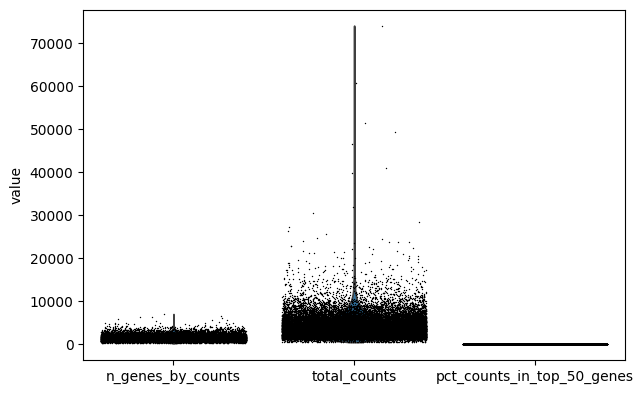

In [17]:
# 5️⃣ 📊 Resumen de la matriz de expresión
sc.pp.calculate_qc_metrics(adata_test, inplace=True)
sc.pl.violin(adata_test, ['n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes'], jitter=0.4)


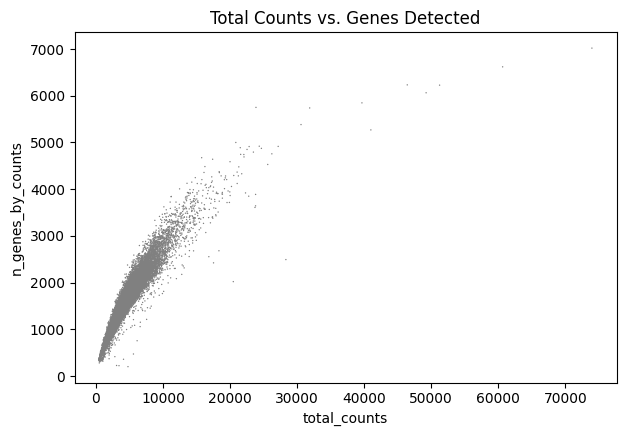

In [18]:
# 6️⃣ 🔬 Distribución de genes y cuentas
sc.pl.scatter(adata_test, x='total_counts', y='n_genes_by_counts', title="Total Counts vs. Genes Detected")


In [20]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [21]:
glioblastoma_norm_file = os.path.join(data_path, "glioblastoma_normalized.h5ad")
glioblastoma_raw_file = os.path.join(data_path, "glioblastoma_raw.h5ad")
pbmc3k_file = os.path.join(data_path, "pbmc3k.h5ad")

adata_glioblastoma_norm = sc.read_h5ad(glioblastoma_norm_file)
adata_glioblastoma_raw = sc.read_h5ad(glioblastoma_raw_file)
adata_pbmc3k = sc.read_h5ad(pbmc3k_file)

c:\Users\henry\miniconda3\envs\ml_venv\lib\site-packages\anndata\compat\__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
c:\Users\henry\miniconda3\envs\ml_venv\lib\site-packages\anndata\compat\__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [22]:
common_genes = list(set(adata_test.var_names) & set(adata_pbmc3k.var_names) & 
                    set(adata_glioblastoma_norm.var_names) & set(adata_glioblastoma_raw.var_names))

print(f"Number of common genes: {len(common_genes)}")


Number of common genes: 0
